# Assignment 3

In [1]:
import pandas as pd
file = r'C:\Users\User\Downloads\archive (1)\Netflix.csv'
df = pd.read_csv(file)
df.head(20)# prints only first 20 values from the data

title              genre  \
0                                    Notes for My Son              Drama   
1                                    To Each, Her Own    Romantic comedy   
2                                       The Lovebirds    Romantic comedy   
3                                      The Perfection    Horror-thriller   
4                                   Happy Anniversary    Romantic comedy   
5                                Why Did You Kill Me?        Documentary   
6                                       Death to 2020             Comedy   
7                    Brene Brown: The Call to Courage        Documentary   
8                            Operation Christmas Drop    Romantic comedy   
9   The Lonely Island Presents: The Unauthorized B...   Comedy / Musical   
10   Porta dos Fundos: The First Temptation of Christ             Comedy   
11                            El Pepe: A Supreme Life        Documentary   
12               Sky Ladder: The Art of Cai Guo-Qiang        Documentary   
13                                   Out of Many, One        Documentary   
14                     If Anything Happens I Love You  Animation / Short   
15                                              Polar             Action   
16                                       Shimmer Lake     Crime thriller   
17                                  In the Tall Grass             Horror   
18                                  Pieces of a Woman              Drama   
19                        The Knight Before Christmas    Romantic comedy   

            language  imdb_score    premiere  runtime  year  
0            Spanish         6.3  11/24/2020       83  2020  
1             French         5.3   6/24/2018       95  2018  
2            English         6.1   5/22/2020       87  2020  
3            English         6.1   5/24/2019       90  2019  
4            English         5.8   3/30/2018       78  2018  
5            English         5.6   4/14/2021       83  2021  
6            English         6.8  12/27/2020       70  2020  
7            English         7.7   4/19/2019       76  2019  
8            English         5.8   11/5/2020       96  2020  
9            English         6.9   5/23/2019       30  2019  
10        Portuguese         4.6   12/3/2019       46  2019  
11           Spanish         7.1  12/27/2019       73  2019  
12  English/Mandarin         7.3  10/14/2016       79  2016  
13           English         5.7  12/12/2018       34  2018  
14           English         7.8  11/20/2020       12  2020  
15           English         6.3   1/25/2019      118  2019  
16           English         6.3    6/9/2017       86  2017  
17           English         5.4   10/4/2019      101  2019  
18           English         7.1    1/7/2021      126  2021  
19           English         5.5  11/21/2019       92  2019

# Get the stopwords

In [2]:
import nltk 
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)


{'on', 'been', 'me', 'own', 'won', 'do', 'needn', 'does', 'more', 'about', 'them', 'now', 'this', "you've", "don't", 'wasn', 'doesn', 'was', "it's", 'between', 'few', 'he', 'so', 'aren', 'wouldn', "aren't", "you'd", 'above', 'that', 'shan', 'having', 'in', "hasn't", 'our', 'its', "wasn't", 'were', 'too', 'have', 'here', 'before', 'what', 'it', "that'll", 'is', 'd', "wouldn't", 'as', 'doing', 'has', 'him', 'yourself', 'into', 'all', 'm', 'y', 'can', 'mustn', 'whom', "mustn't", 'ma', 'but', 'with', 'out', 'then', 'll', 'you', 'through', "should've", 'haven', 'those', 'i', 'from', 'her', 'while', 'yours', "couldn't", 'other', 'after', 'am', "shan't", 'ourselves', 'yourselves', 'did', 'don', "didn't", 'below', 'itself', 'because', 'myself', 'themselves', 'no', 'off', 'ain', 'against', "doesn't", 'when', 'hasn', "shouldn't", "you'll", 'during', 'ours', 'both', "haven't", 'mightn', 'his', 'of', 'until', 'himself', 'are', 'how', 'nor', 'had', 'my', 'an', 'should', 'where', 've', 'we', 'to', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


# Pre-processing pipeline

In [5]:
import regex as re

def tokenize(title):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', title)
def remove_stop(tokens):
    return [token for token in tokens if token.lower() not in stopwords]
pipeline = [str.lower, tokenize, remove_stop]

def prepare(title, pipeline):
    tokens = title
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens
df['tokens'] = df['title'].apply(prepare, pipeline=pipeline)


# Now count the tokens

In [6]:
from collections import Counter
counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'tokens'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)


freq
tokens          
christmas     18
love          14
life           9
remastered     8
two            7
island         6
american       6
movie          6
one            6
us             6

# Now draw the word cloud

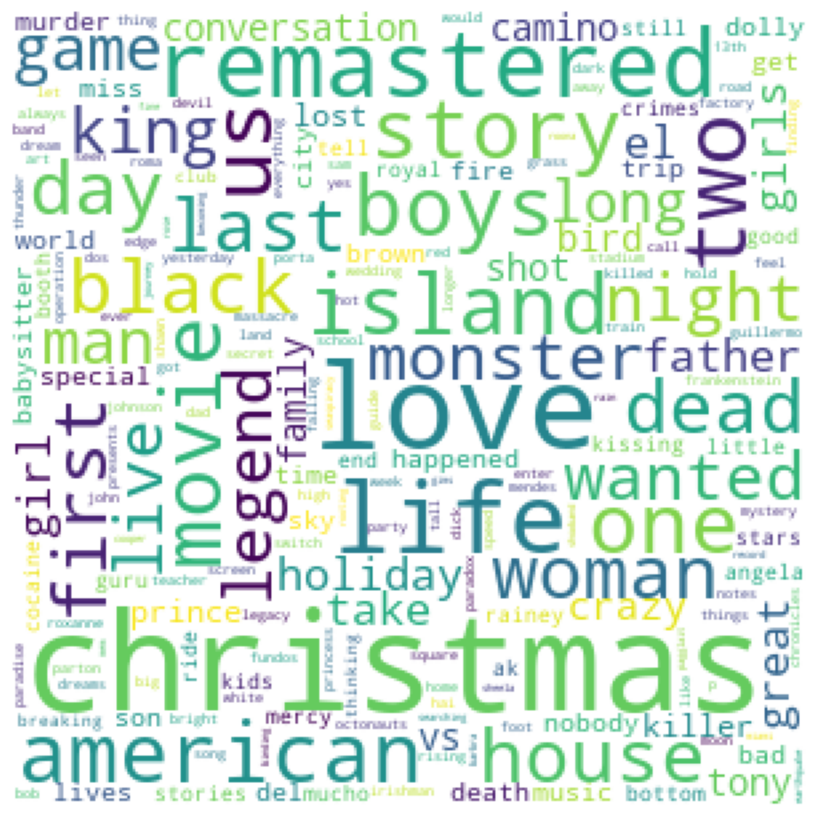

In [7]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wc = WordCloud(background_color='white', width = 300, height=300, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Now let’s do the TFIDF and compare

In [8]:
import numpy as np
def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
    # count tokens
    counter = Counter()
    df[column].map(update)
    # create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'tokens'
    return idf_df
idf_df = compute_idf(df)

# TFIDF = TF * IDF

In [9]:
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head()


freq      tfidf
tokens                     
christmas     18  64.400678
love          14  53.607818
life           9  38.438663
remastered     8  35.109965
two            7  31.655939

# Let’s draw the word cloud

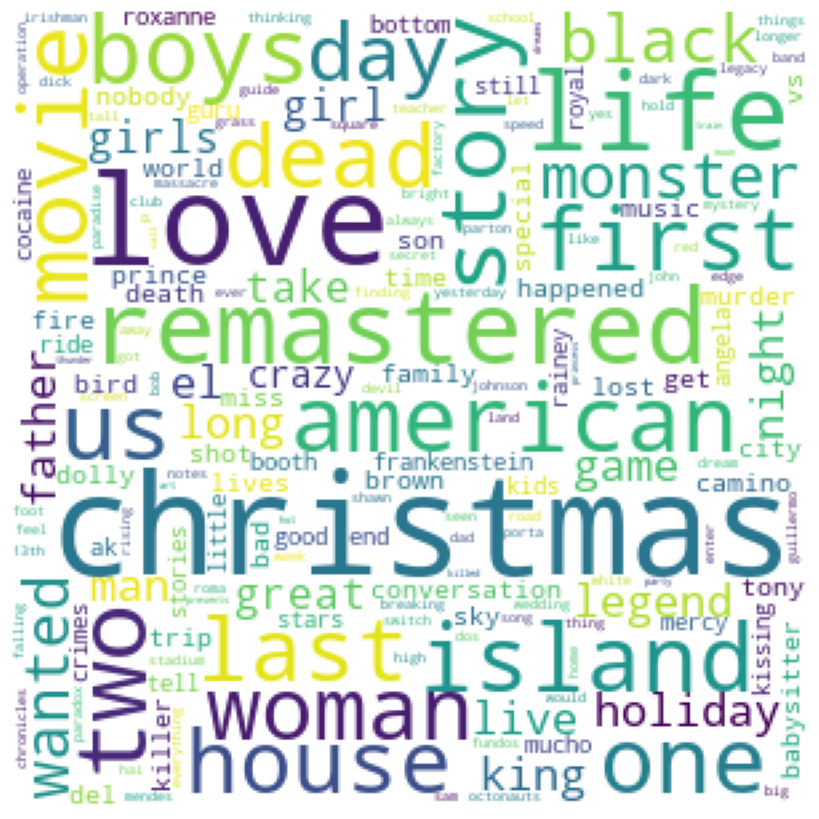

In [10]:
wc = WordCloud(background_color='white', width = 300, height=300, margin=2)
wc.fit_words(freq_df['tfidf'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Function to count the keywords

In [11]:
df['num_tokens'] = df['tokens'].map(len)

def count_keywords(tokens, keywords): 
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]


# Function to group by year

In [12]:
def count_keywords_by(df, by, keywords, column='tokens'):
    
    df = df.reset_index(drop=True) # if the supplied dataframe has gaps in the index
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix, columns=keywords)
    freq_df[by] = df[by] # copy the grouping column(s)
    
    return freq_df.groupby(by=by).sum().sort_values(by)


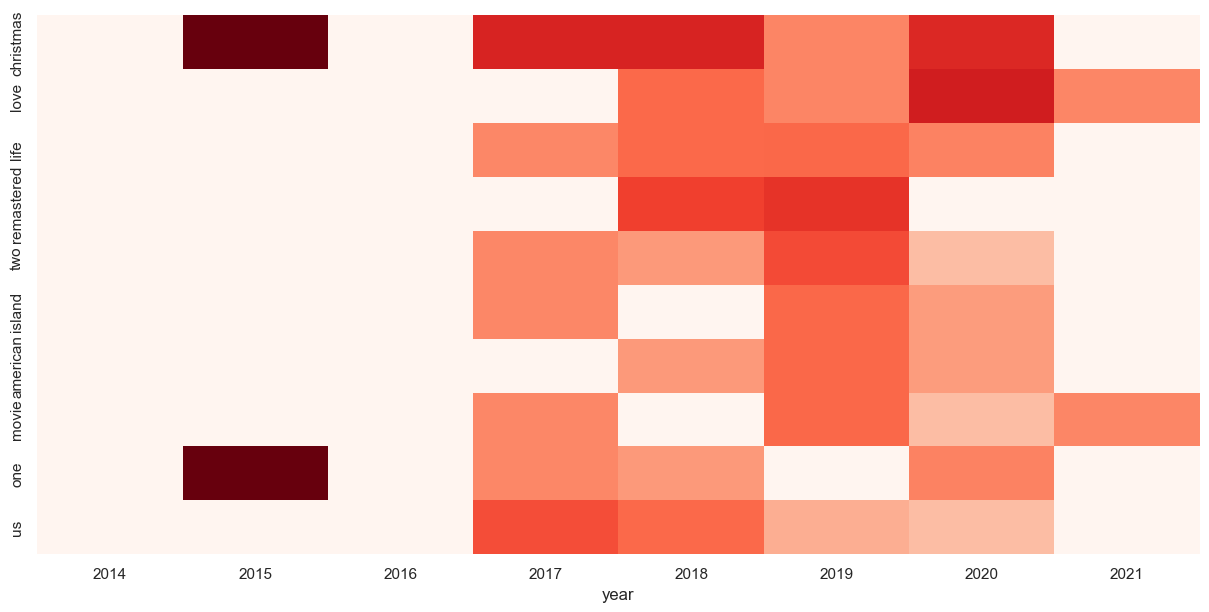

In [16]:
import seaborn as sns
keywords = ['christmas','love', 'life', 'remastered', 'two',
            'island', 'american', 'movie', 'one', 'us']  
freq_df = count_keywords_by(df, by='year', keywords=keywords)
# compute relative frequencies based on total number of tokens per year
freq_df = freq_df.div(df.groupby('year')['num_tokens'].sum(), axis=0)
# apply square root as sublinear filter for better contrast
freq_df = freq_df.apply(np.sqrt)
plt.figure(figsize=(15, 7)) 
sns.set(font_scale=1) 
sns.heatmap(data=freq_df.T, 
            xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")
sns.set(font_scale=1)


# Year=2017 (for comparision)

In [17]:
import pandas as pd
file = r'C:\Users\User\Downloads\archive (1)\Netflix.csv'
df = pd.read_csv(file)
df= df[df['year']==2017]
df.head(20)

title                     genre  \
16                                Shimmer Lake            Crime thriller   
21                          Our Souls at Night                   Romance   
26                                      Icarus               Documentary   
28                                    Clinical                  Thriller   
44                                  Coin Heist                     Heist   
46                                  The Killer                   Western   
50                         El Camino Christmas               Dark comedy   
63                             Imperial Dreams                     Drama   
67                                 Sand Castle                       War   
88                         The Mars Generation               Documentary   
92                The Incredible Jessica James                    Comedy   
97                                #REALITYHIGH                    Comedy   
101                    Cuba and the Cameraman                Documentary   
102                      Christmas Inheritance            Romantic drama   
111                              Strong Island               Documentary   
117  The Meyerowitz Stories (New and Selected)              Comedy-drama   
121                                       iBoy  Science fiction/Thriller   
137                                Little Evil             Comedy horror   
143                              Burning Sands                     Drama   
152                                 Win It All                    Comedy   

       language  imdb_score    premiere  runtime  year  
16      English         6.3    6/9/2017       86  2017  
21      English         6.9   9/29/2017      103  2017  
26      English         7.9    8/4/2017      120  2017  
28      English         5.1   1/13/2017      104  2017  
44      English         4.8    1/6/2017       97  2017  
46   Portuguese         6.1  11/10/2017       99  2017  
50      English         5.7   12/8/2017       89  2017  
63      English         6.7    2/3/2017       87  2017  
67      English         6.3   4/21/2017      113  2017  
88      English         6.4    5/5/2017       97  2017  
92      English         6.5   7/28/2017       83  2017  
97      English         5.2    9/8/2017       99  2017  
101     English         8.3  11/24/2017      114  2017  
102     English         5.7  12/15/2017      104  2017  
111     English         6.4   9/15/2017      107  2017  
117     English         6.9  10/13/2017      112  2017  
121     English         6.0   1/27/2017       90  2017  
137     English         5.7    9/1/2017       94  2017  
143     English         6.1   3/10/2017      102  2017  
152     English         6.2    4/7/2017       88  2017

# Get the stopwords

In [18]:
import nltk 
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)


{'on', 'been', 'me', 'own', 'won', 'do', 'needn', 'does', 'more', 'about', 'them', 'now', 'this', "you've", "don't", 'wasn', 'doesn', 'was', "it's", 'between', 'few', 'he', 'so', 'aren', 'wouldn', "aren't", "you'd", 'above', 'that', 'shan', 'having', 'in', "hasn't", 'our', 'its', "wasn't", 'were', 'too', 'have', 'here', 'before', 'what', 'it', "that'll", 'is', 'd', "wouldn't", 'as', 'doing', 'has', 'him', 'yourself', 'into', 'all', 'm', 'y', 'can', 'mustn', 'whom', "mustn't", 'ma', 'but', 'with', 'out', 'then', 'll', 'you', 'through', "should've", 'haven', 'those', 'i', 'from', 'her', 'while', 'yours', "couldn't", 'other', 'after', 'am', "shan't", 'ourselves', 'yourselves', 'did', 'don', "didn't", 'below', 'itself', 'because', 'myself', 'themselves', 'no', 'off', 'ain', 'against', "doesn't", 'when', 'hasn', "shouldn't", "you'll", 'during', 'ours', 'both', "haven't", 'mightn', 'his', 'of', 'until', 'himself', 'are', 'how', 'nor', 'had', 'my', 'an', 'should', 'where', 've', 'we', 'to', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


# Pre-processing pipeline

In [20]:
import regex as re

def tokenize(title):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', title)
def remove_stop(tokens):
    return [token for token in tokens if token.lower() not in stopwords]
pipeline = [str.lower, tokenize, remove_stop]

def prepare(title, pipeline):
    tokens = title
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens
df['tokens'] = df['title'].apply(prepare, pipeline=pipeline)


# Now count the tokens

In [21]:
from collections import Counter
counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'tokens'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)


freq
tokens         
christmas     3
us            2
death         2
day           2
special       2
laney         1
deidra        1
nobody        1
speak         1
trials        1

# Now draw the word cloud

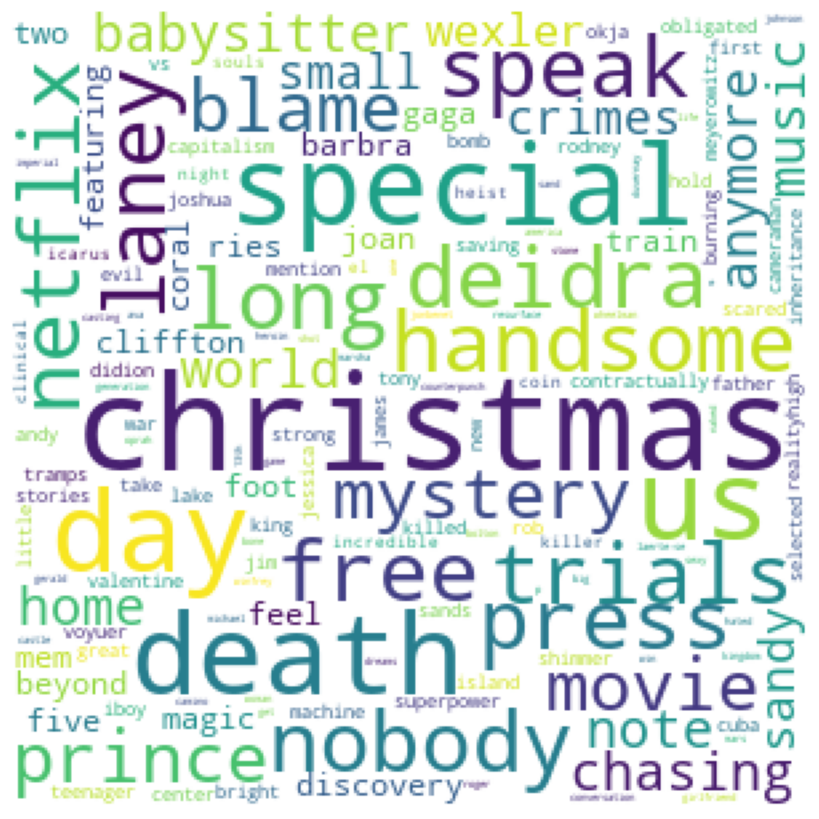

In [22]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wc = WordCloud(background_color='white', width = 300, height=300, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Now let’s do the TFIDF and compare

In [23]:
import numpy as np
def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
    # count tokens
    counter = Counter()
    df[column].map(update)
    # create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'tokens'
    return idf_df
idf_df = compute_idf(df)

# TFIDF = TF * IDF

In [24]:
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head()


freq     tfidf
tokens                   
christmas     3  9.573127
us            2  7.193015
death         2  7.193015
day           2  7.193015
special       2  7.193015

# Let’s draw the word cloud

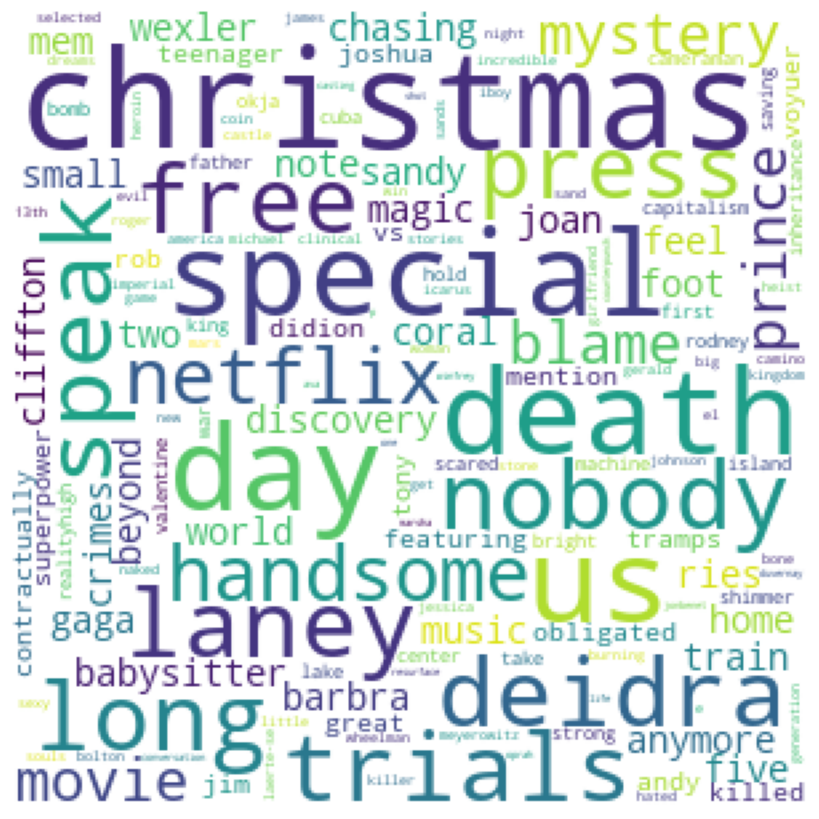

In [25]:
wc = WordCloud(background_color='white', width = 300, height=300, margin=2)
wc.fit_words(freq_df['tfidf'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Function to count the keywords

In [26]:
df['num_tokens'] = df['tokens'].map(len)

def count_keywords(tokens, keywords): 
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]


# Function to group by year

In [27]:
def count_keywords_by(df, by, keywords, column='tokens'):
    
    df = df.reset_index(drop=True) # if the supplied dataframe has gaps in the index
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix, columns=keywords)
    freq_df[by] = df[by] # copy the grouping column(s)
    
    return freq_df.groupby(by=by).sum().sort_values(by)


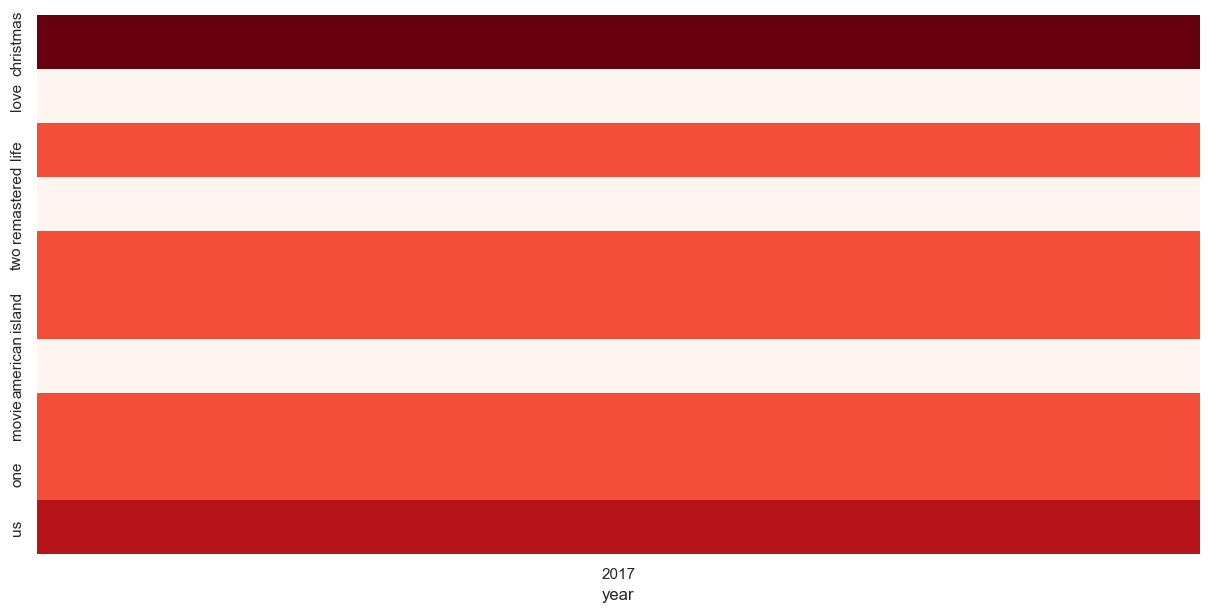

In [28]:
import seaborn as sns
keywords = ['christmas','love', 'life', 'remastered', 'two',
            'island', 'american', 'movie', 'one', 'us']  
freq_df = count_keywords_by(df, by='year', keywords=keywords)
# compute relative frequencies based on total number of tokens per year
freq_df = freq_df.div(df.groupby('year')['num_tokens'].sum(), axis=0)
# apply square root as sublinear filter for better contrast
freq_df = freq_df.apply(np.sqrt)
plt.figure(figsize=(15, 7)) 
sns.set(font_scale=1) 
sns.heatmap(data=freq_df.T, 
            xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")
sns.set(font_scale=1)


# Year = 2021

In [29]:
import pandas as pd
file = r'C:\Users\User\Downloads\archive (1)\Netflix.csv'
df = pd.read_csv(file)
df= df[df['year']==2021]
df.head(20)

title                         genre  \
5                       Why Did You Kill Me?                   Documentary   
18                         Pieces of a Woman                         Drama   
29                           Crazy About Her               Romantic comedy   
30                         Night in Paradise                         Drama   
33                            I Am All Girls                      Thriller   
42                                Sentinelle                        Action   
49                          Outside the Wire        Action/Science fiction   
54                           The White Tiger                         Drama   
68                          Caught by a Wave           Romantic teen drama   
71               What Would Sophia Loren Do?                   Documentary   
84                              Get the Goat                        Comedy   
105                                  Red Dot                      Thriller   
113                           Space Sweepers               Science fiction   
123                              Ride or Die  Psychological thriller drama   
125                            Get the Grift                        Comedy   
126                          Concrete Cowboy                         Drama   
132                              June & Kopi                         Drama   
134                                  Monster                         Drama   
138                                    Ferry                   Crime drama   
166  Chadwick Boseman: Portrait of an Artist                   Documentary   

       language  imdb_score   premiere  runtime  year  
5       English         5.6  4/14/2021       83  2021  
18      English         7.1   1/7/2021      126  2021  
29      Spanish         6.6  2/26/2021      102  2021  
30       Korean         6.7   4/9/2021      132  2021  
33      English         5.8  5/14/2021      107  2021  
42       French         4.7   3/5/2021       80  2021  
49      English         5.4  1/15/2021      114  2021  
54      English         7.1  1/22/2021      125  2021  
68      Italian         5.7  3/25/2021       99  2021  
71      English         6.6  1/15/2021       32  2021  
84   Portuguese         6.3  3/18/2021       97  2021  
105     Swedish         5.5  2/11/2021       86  2021  
113      Korean         6.6   2/5/2021      136  2021  
123    Japanese         5.5  4/15/2021      142  2021  
125  Portuguese         5.5  4/28/2021       94  2021  
126     English         6.3   4/2/2021      111  2021  
132  Indonesian         6.3  1/28/2021       90  2021  
134     English         6.5   5/7/2021       98  2021  
138       Dutch         7.1  5/14/2021      106  2021  
166     English         6.5  4/17/2021       21  2021

# Get the stopwords

In [30]:
import nltk 
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)


{'on', 'been', 'me', 'own', 'won', 'do', 'needn', 'does', 'more', 'about', 'them', 'now', 'this', "you've", "don't", 'wasn', 'doesn', 'was', "it's", 'between', 'few', 'he', 'so', 'aren', 'wouldn', "aren't", "you'd", 'above', 'that', 'shan', 'having', 'in', "hasn't", 'our', 'its', "wasn't", 'were', 'too', 'have', 'here', 'before', 'what', 'it', "that'll", 'is', 'd', "wouldn't", 'as', 'doing', 'has', 'him', 'yourself', 'into', 'all', 'm', 'y', 'can', 'mustn', 'whom', "mustn't", 'ma', 'but', 'with', 'out', 'then', 'll', 'you', 'through', "should've", 'haven', 'those', 'i', 'from', 'her', 'while', 'yours', "couldn't", 'other', 'after', 'am', "shan't", 'ourselves', 'yourselves', 'did', 'don', "didn't", 'below', 'itself', 'because', 'myself', 'themselves', 'no', 'off', 'ain', 'against', "doesn't", 'when', 'hasn', "shouldn't", "you'll", 'during', 'ours', 'both', "haven't", 'mightn', 'his', 'of', 'until', 'himself', 'are', 'how', 'nor', 'had', 'my', 'an', 'should', 'where', 've', 'we', 'to', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


# Pre-processing pipeline

In [32]:
import regex as re

def tokenize(title):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', title)
def remove_stop(tokens):
    return [token for token in tokens if token.lower() not in stopwords]
pipeline = [str.lower, tokenize, remove_stop]

def prepare(title, pipeline):
    tokens = title
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens
df['tokens'] = df['title'].apply(prepare, pipeline=pipeline)


# Now count the tokens

In [33]:
from collections import Counter
counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'tokens'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)


freq
tokens        
woman        2
crazy        2
get          2
seen         2
yes          2
kill         1
happened     1
sardar       1
ka           1
grandson     1

# Now draw the word cloud

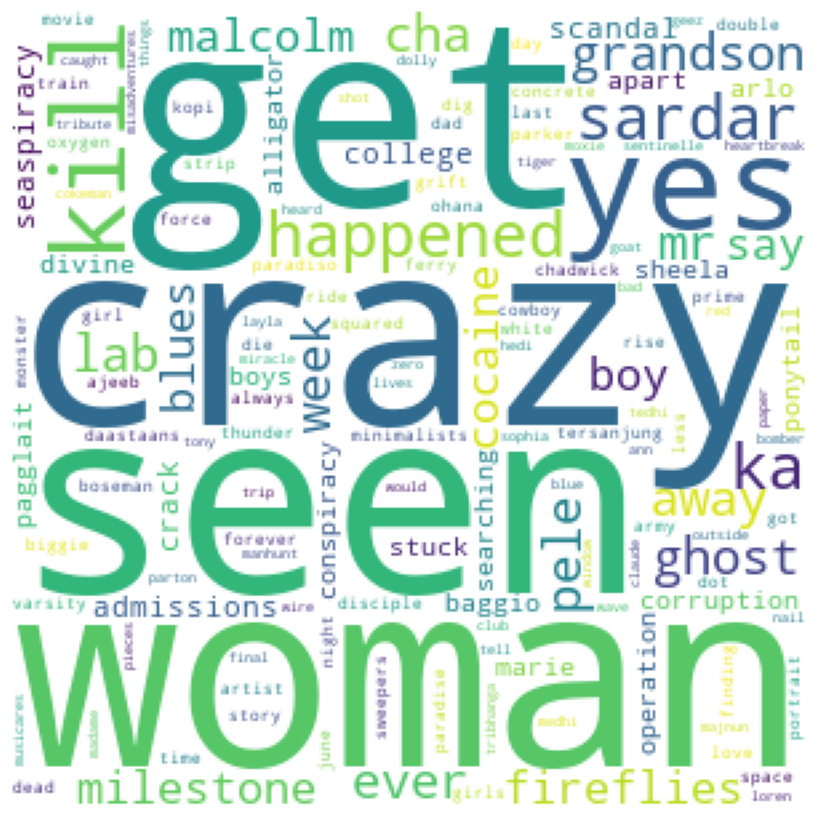

In [34]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wc = WordCloud(background_color='white', width = 300, height=300, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Now let’s do the TFIDF and compare

In [36]:
import numpy as np
def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
    # count tokens
    counter = Counter()
    df[column].map(update)
    # create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'tokens'
    return idf_df
idf_df = compute_idf(df)

# TFIDF = TF * IDF

In [37]:
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head()


freq     tfidf
tokens                
woman      2  7.339065
crazy      2  7.339065
get        2  7.339065
seen       2  7.339065
yes        2  7.339065

# Let’s draw the word cloud

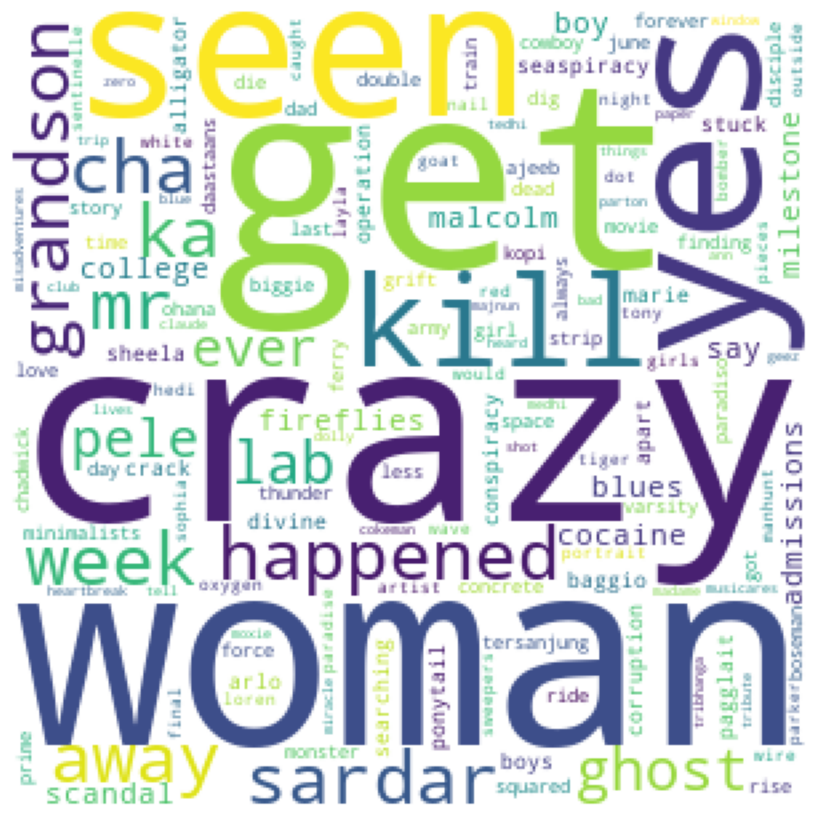

In [38]:
wc = WordCloud(background_color='white', width = 300, height=300, margin=2)
wc.fit_words(freq_df['tfidf'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Function to count the keywords

In [39]:
df['num_tokens'] = df['tokens'].map(len)

def count_keywords(tokens, keywords): 
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]


# Function to group by year

In [40]:
def count_keywords_by(df, by, keywords, column='tokens'):
    
    df = df.reset_index(drop=True) # if the supplied dataframe has gaps in the index
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix, columns=keywords)
    freq_df[by] = df[by] # copy the grouping column(s)
    
    return freq_df.groupby(by=by).sum().sort_values(by)


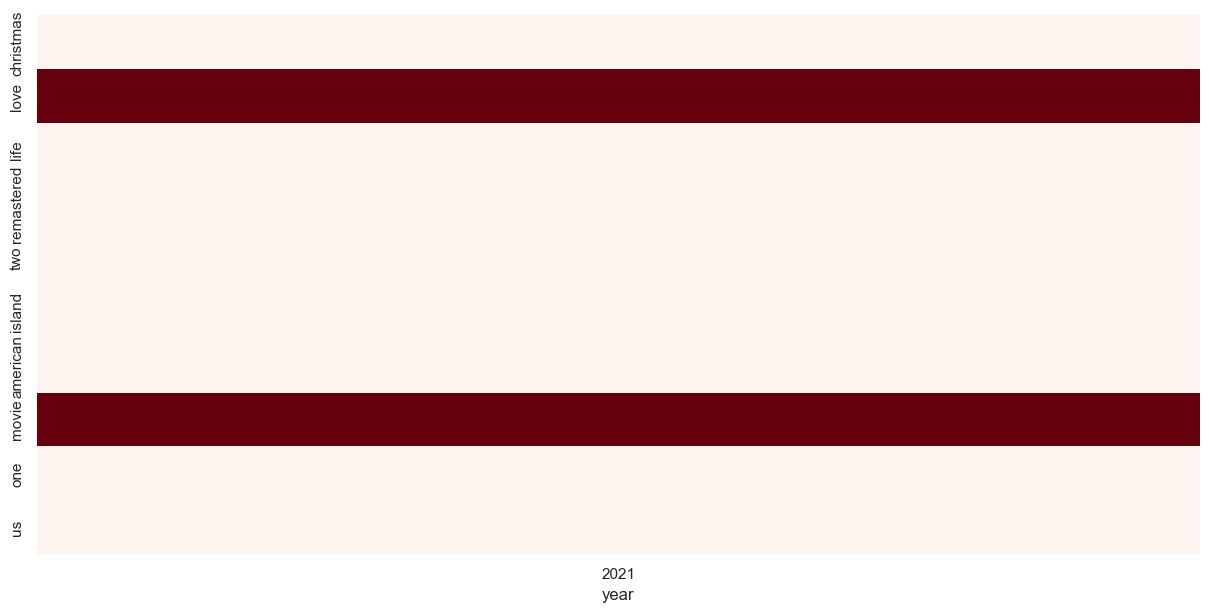

In [41]:
import seaborn as sns
keywords = ['christmas','love', 'life', 'remastered', 'two',
            'island', 'american', 'movie', 'one', 'us']  
freq_df = count_keywords_by(df, by='year', keywords=keywords)
# compute relative frequencies based on total number of tokens per year
freq_df = freq_df.div(df.groupby('year')['num_tokens'].sum(), axis=0)
# apply square root as sublinear filter for better contrast
freq_df = freq_df.apply(np.sqrt)
plt.figure(figsize=(15, 7)) 
sns.set(font_scale=1) 
sns.heatmap(data=freq_df.T, 
            xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")
sns.set(font_scale=1)
